In [1]:
%pylab inline
from pylab import rcParams
from math import log
rcParams['figure.figsize'] = 16, 10
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('data/train.csv', index_col='Id')
ts = pd.read_csv('data/test.csv', index_col='Id')

In [3]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Skewness: 1.882876
Kurtosis: 6.536282


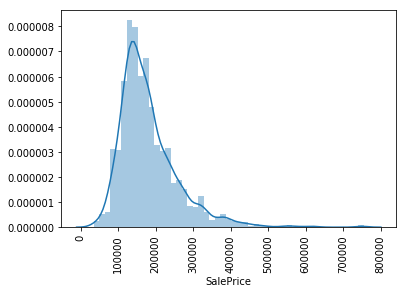

In [49]:
#histogram
sns.distplot(df['SalePrice']);
plt.xticks(rotation=90);
#skewness and kurtosis
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

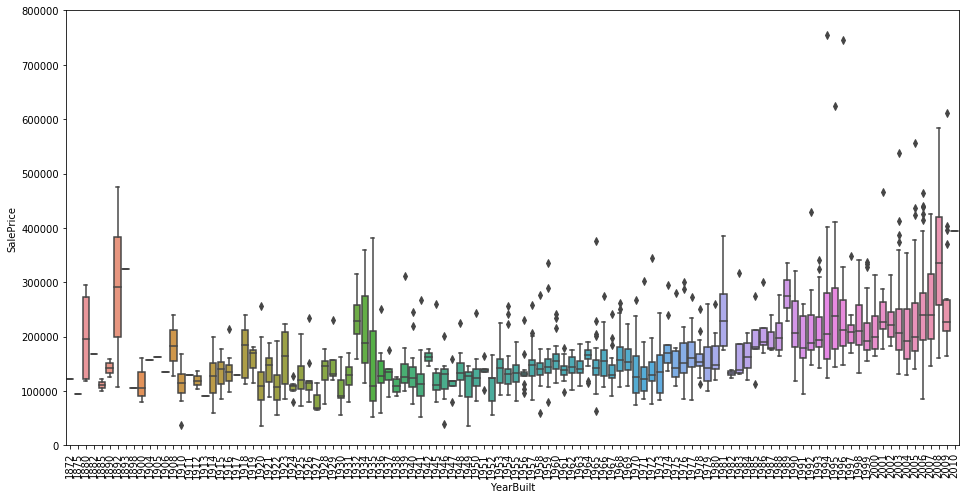

In [44]:
#box plot overallqual/saleprice
var = 'YearBuilt' #'OverallQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

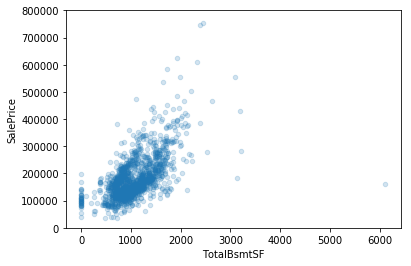

In [47]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), alpha=0.2);

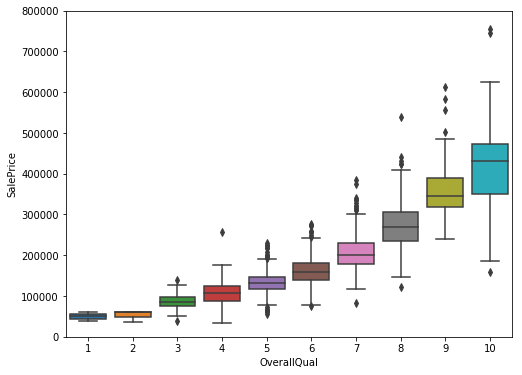

In [51]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [4]:
usefull_columns = ['LotArea', 'MSSubClass', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd']
train = df[usefull_columns + ['SalePrice']]
train.head()

,LotArea,MSSubClass,YearBuilt,YearRemodAdd,TotRmsAbvGrd,SalePrice
Id,,,,,,
1,8450,60,2003,2003,8,208500
2,9600,20,1976,1976,6,181500
3,11250,60,2001,2002,6,223500
4,9550,70,1915,1970,7,140000
5,14260,60,2000,2000,9,250000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 6 columns):
LotArea         1460 non-null int64
MSSubClass      1460 non-null int64
YearBuilt       1460 non-null int64
YearRemodAdd    1460 non-null int64
TotRmsAbvGrd    1460 non-null int64
SalePrice       1460 non-null int64
dtypes: int64(6)
memory usage: 79.8 KB


In [17]:
pd_X = train.loc[:, usefull_columns]
pd_Y = train.SalePrice
pd_test_X = ts.loc[:, usefull_columns]
pd_X.info()
pd_test_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 5 columns):
LotArea         1460 non-null int64
MSSubClass      1460 non-null int64
YearBuilt       1460 non-null int64
YearRemodAdd    1460 non-null int64
TotRmsAbvGrd    1460 non-null int64
dtypes: int64(5)
memory usage: 68.4 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 5 columns):
LotArea         1459 non-null int64
MSSubClass      1459 non-null int64
YearBuilt       1459 non-null int64
YearRemodAdd    1459 non-null int64
TotRmsAbvGrd    1459 non-null int64
dtypes: int64(5)
memory usage: 68.4 KB


In [28]:
from sklearn import linear_model
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

models = {
    "LinearRegression":       linear_model.LinearRegression(),
    "Ridge":                  linear_model.Ridge(alpha = .5),
    "RidgeCV":                linear_model.RidgeCV(),
    "Lasso":                  linear_model.Lasso(alpha = 0.1),
    "LassoLarsCV":            linear_model.LassoLarsCV(cv=20),
    "RBF":                    SVR(kernel='rbf', C=1e3, gamma=0.001),
    "RBF_LIN":                SVR(kernel='linear', C=1e3),
    #"AveragingModels"         AveragingModels(models = (ENet, GBoost, KRR, lasso))
}

In [34]:
X = np.asarray(pd_X)
Y = np.asarray(pd_Y)
X_test = np.asarray(pd_test_X)
#X_test = np.asarray(pd_test_X)
#Y_test = np.asarray(pd_test_Y)
kf = KFold(5, shuffle=True, random_state=42).get_n_splits(train.values)

for c in models:
    mdl = models[c]
    mdl.fit(X, Y)
    Y_pred = mdl.predict(X)
    
    result = mean_squared_error(Y, Y_pred)
    r2_res = r2_score(Y, Y_pred)
    crossVal = cross_val_score(mdl, X, Y, scoring="neg_mean_squared_error", cv=10)
    #rmse = np.sqrt(mean_squared_error(Y, Y_pred))
    rmse= np.sqrt(-cross_val_score(mdl, X, Y, scoring="neg_mean_squared_error", cv = kf))
    
    print('{:>20}  Self: {:.2f} MSE: {:.2f} R2: {:.2f} RMSE: {:.2f} (+/-{:.2f})'
          .format(c, mdl.score(X, Y), result, r2_res, rmse.mean(), rmse.std()))
    Y_test_pred = mdl.predict(X_test)


    LinearRegression  Self: 0.58 MSE: 2675749831.57 R2: 0.58 RMSE: 52014.18 (+/-5635.82)
               Ridge  Self: 0.58 MSE: 2675749852.97 R2: 0.58 RMSE: 52014.25 (+/-5635.72)
             RidgeCV  Self: 0.58 MSE: 2675749946.06 R2: 0.58 RMSE: 52013.73 (+/-5635.22)
               Lasso  Self: 0.58 MSE: 2675749831.57 R2: 0.58 RMSE: 52014.18 (+/-5635.82)


In [22]:
submission = pd.DataFrame({
        "Id": ts.index,
        "SalePrice": Y_test_pred
    })
submission.to_csv('data/submission.csv', index=False)